<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Cleaning**

In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df.dropna(subset=['Embarked'], inplace=True)

In [13]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
Age_Mean = df['Age'].mean()

In [15]:
df['Age'] = df['Age'].fillna(Age_Mean)

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Data Visualization**

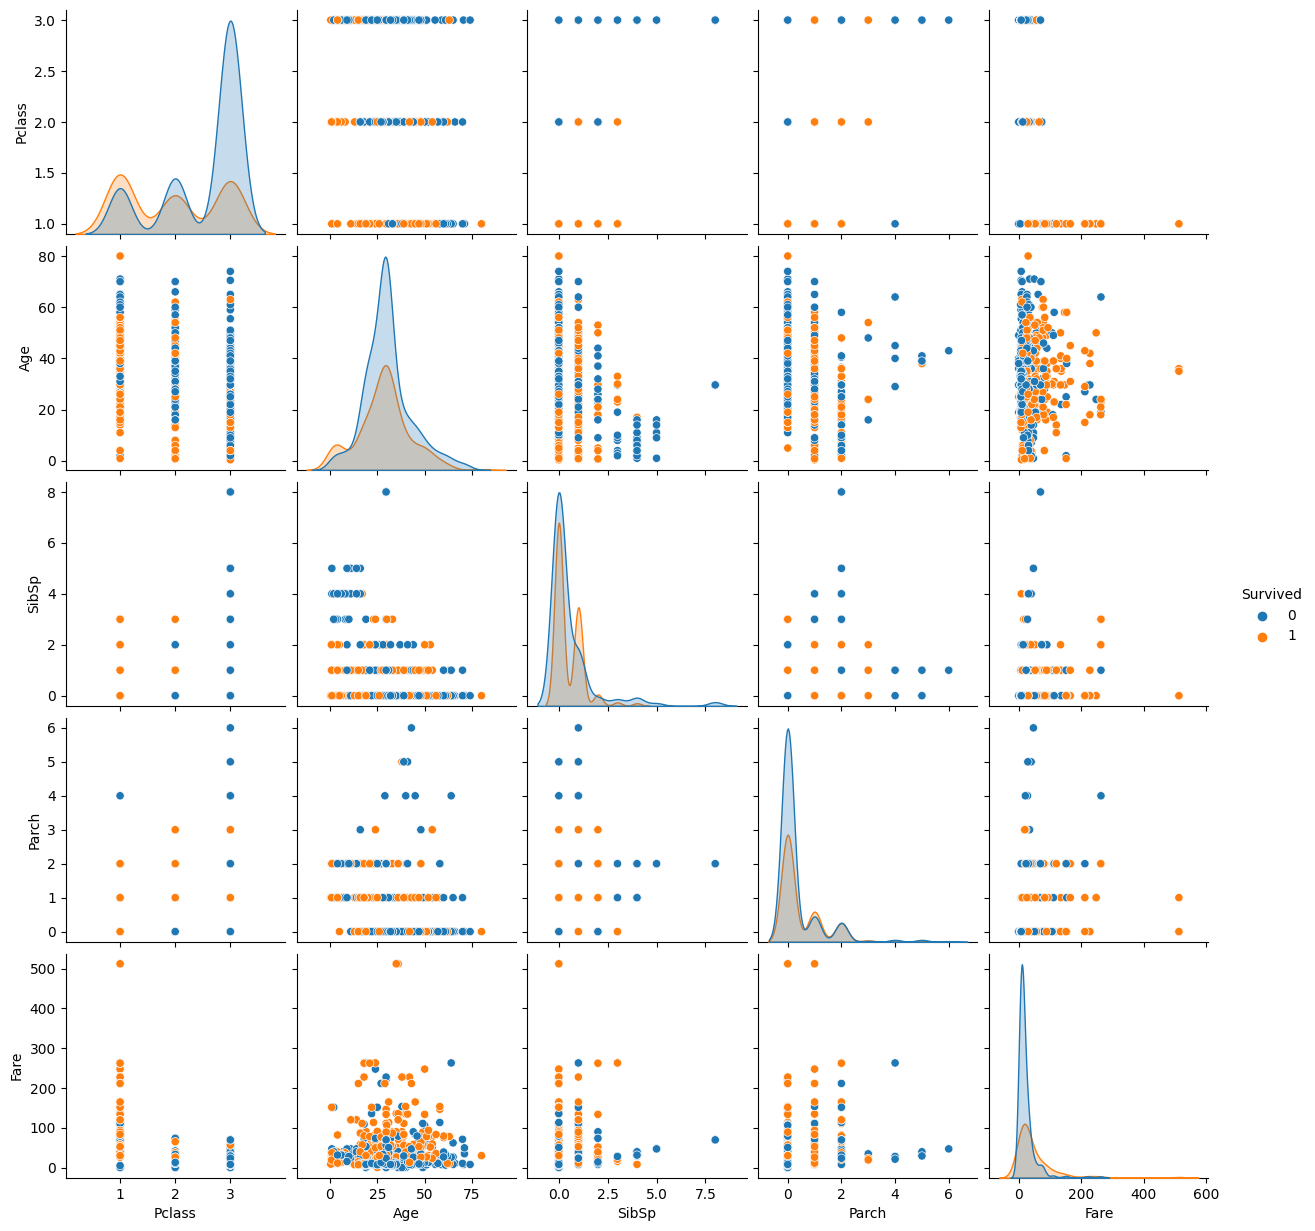

In [17]:
sns.pairplot(df,hue='Survived')
plt.show()

HeatMap

<ipython-input-18-1a8a53118381>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = df.corr()


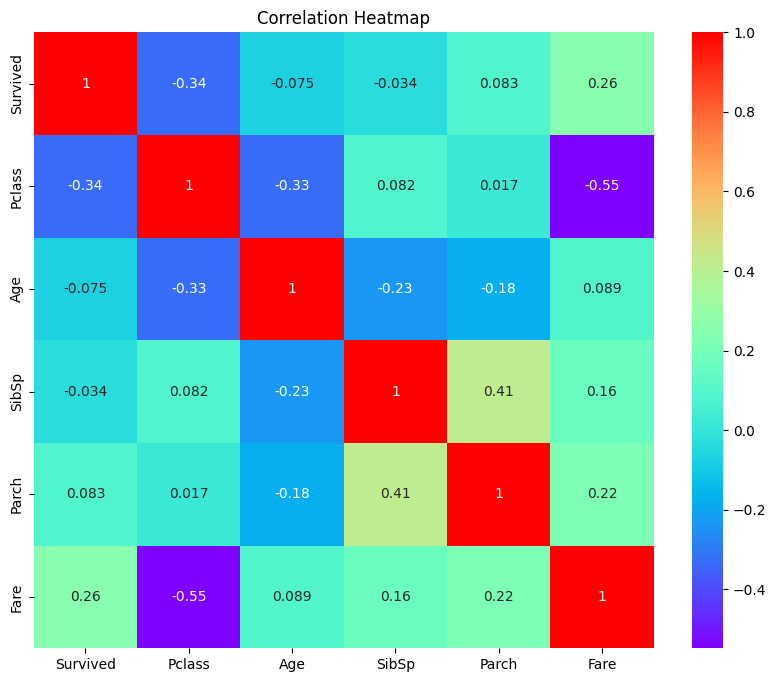

In [18]:
Corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(Corr, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')
plt.show()

**Feature Engineering**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
Le = LabelEncoder()

In [21]:
df['Sex'] = Le.fit_transform(df['Sex'])

In [22]:
df['Embarked'] = Le.fit_transform(df['Embarked'])

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Train & Test Split**

In [24]:
X = df.iloc[:,1:]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.642093,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [25]:
y = df.iloc[:,:1]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
y_train_1d = np.ravel(y_train)

**RandomForest & Bayesain(For Best Hyperparamters)**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
RNF = RandomForestClassifier()

In [31]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp,tpe,fmin,Trials,STATUS_OK

In [32]:
Para = {
    'n_estimators' : hp.quniform('n_estimators',50,500,50),
    'criterion' : hp.choice('criterion',["gini", "entropy", "log_loss"]),
    'max_depth' : hp.quniform('max_depth',1,10,1),
    'max_features' : hp.choice('max_features',["sqrt", "log2", None])
}

In [33]:
def Bayesian(Para):
  RNF = RandomForestClassifier(
      n_estimators = int(Para['n_estimators']),
      criterion = Para['criterion'],
      max_depth = int(Para['max_depth']),
      max_features = Para['max_features']
  )
  accuracy = cross_val_score(RNF,X_train,y_train_1d,cv=10).mean()
  return{'loss' : -accuracy , 'status' : STATUS_OK}

In [34]:
trials = Trials()

In [35]:
Best = fmin(fn=Bayesian,space=Para,max_evals=200,trials=trials,algo=tpe.suggest)

100%|██████████| 200/200 [13:56<00:00,  4.18s/trial, best loss: -0.8551838810641627]


In [36]:
Best

{'criterion': 0, 'max_depth': 8.0, 'max_features': 0, 'n_estimators': 150.0}

In [53]:
RNF = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 8,
    max_features = 'sqrt',
    n_estimators = 150
)

In [54]:
RNF.fit(X_train,y_train_1d)

RandomForestClassifier(max_depth=8, n_estimators=150)

**Prediction Using RandomForest**

In [55]:
y_hat = RNF.predict(X_test)

**Model Evaluation**

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [57]:
print(accuracy_score(y_test,y_hat))

0.797752808988764


In [58]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       109
           1       0.75      0.71      0.73        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [59]:
print(confusion_matrix(y_test,y_hat))

[[93 16]
 [20 49]]


In [60]:
sub = pd.read_csv('/content/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
test_df = pd.read_csv('/content/test.csv')

In [62]:
# Drop unnecessary columns
test_df = test_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# Fill missing values in 'Age' column with the mean
test_df['Age'].fillna(Age_Mean, inplace=True)

# Encode categorical features
test_df['Sex'] = Le.fit_transform(test_df['Sex'])
test_df['Embarked'] = Le.fit_transform(test_df['Embarked'])


In [63]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [64]:
Fare_mean = test_df['Fare'].mean()

In [65]:
test_df['Fare'].fillna(Fare_mean,inplace=True)

In [66]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
# Get the PassengerId values from the original test dataset
passenger_ids = pd.read_csv('/content/test.csv')['PassengerId']

# Predict using the trained Random Forest model
test_predictions = RNF.predict(test_df)

# Create a DataFrame with PassengerId and the predicted values
predictions_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': test_predictions})

# Save the predictions to a CSV file
predictions_df.to_csv('/content/predictions.csv', index=False)


In [68]:
final = pd.read_csv('/content/predictions.csv')
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
